In [1]:
import torch
import cv2
import matplotlib.pyplot as plt

import tqdm as notebook_tqdm
import numpy as np
from sklearn.decomposition import PCA

/home/din/anaconda3/envs/anom-detect/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# img_rgb = cv2.imread('dataset/SteelSegE/final/train/1.png')
# img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
# img_label = cv2.imread('dataset/SteelSegE/final/train/1_label.png')
     


# #show both images side by side
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(img_rgb)
# axes[0].set_title('RGB')
# axes[0].axis('off')
# axes[1].imshow(img_lab)
# axes[1].set_title('LAB')
# axes[1].axis('off')
# plt.show()
     



In [39]:
 
# Load Unet encoding
x0 = torch.load('layer_features/AACC10/x_0.pt')
x00 = torch.load('layer_features/AACC10/x_0_scaled.pt')
x01 = torch.load('layer_features/AACC10/x_coord.pt')

x1 = torch.load('layer_features/AACC10/x_conv1.pt')
x2 = torch.load('layer_features/AACC10/x_conv2.pt')
x3 = torch.load('layer_features/AACC10/x_conv3.pt')
x4 = torch.load('layer_features/AACC10/x_conv4.pt')

am = torch.load('layer_features/AACC10/am_0.pt')
     

In [63]:
# Load Unet encoding
x0 = torch.load('layer_features/AACC1/x_0.pt')
x00 = torch.load('layer_features/AACC1/x_0_scaled.pt')
x01 = torch.load('layer_features/AACC1/x_coord.pt')

x1 = torch.load('layer_features/AACC1/x_conv1.pt')
x2 = torch.load('layer_features/AACC1/x_conv2.pt')
x3 = torch.load('layer_features/AACC1/x_conv3.pt')
x4 = torch.load('layer_features/AACC1/x_conv4.pt')

am = torch.load('layer_features/AACC1/am_0.pt')

In [64]:
x4.shape

torch.Size([1, 34, 32, 32])

In [65]:
embeddings = []
embeddings1 = []
embeddings2 = []
embeddings3 = []
embeddings4 = []
embeddings.append(x0.detach())
embeddings.append(x00.detach())
embeddings.append(x01.detach())
embeddings.append(x1.detach())
embeddings.append(x2.detach())
embeddings.append(x3.detach())
embeddings.append(x4.detach())

embeddings1.append(am.detach())
embeddings1.append(x0.detach())
embeddings2.append(x01.detach())

embeddings4.append(x4.detach())

In [66]:
embeddings4[0].shape

torch.Size([1, 34, 32, 32])

In [67]:
for i in range(len(embeddings)):
    embeddings[i] = embeddings[i].squeeze(0)

In [68]:
for i in range(len(embeddings1)):
    embeddings1[i] = embeddings1[i].squeeze(0)

for i in range(len(embeddings2)):
    embeddings2[i] = embeddings2[i].squeeze(0)

for i in range(len(embeddings3)):
    embeddings3[i] = embeddings3[i].squeeze(0)

In [69]:
  
pca = PCA(n_components=3)
pca_images = []
for emb in embeddings:
    emb_reshaped = emb.view(emb.shape[0], -1).T.cpu().numpy()
    sam_pca = pca.fit_transform(emb_reshaped)
    sam_pca = sam_pca.reshape(emb.shape[-1], emb.shape[-2], 3)
    pca_images.append(sam_pca)

In [70]:
pca = PCA(n_components=1)
pca_images1 = []
for emb in embeddings1:
    emb_reshaped = emb.view(emb.shape[0], -1).T.cpu().numpy()
    sam_pca = pca.fit_transform(emb_reshaped)
    sam_pca = sam_pca.reshape(emb.shape[-1], emb.shape[-2], 1)
    pca_images1.append(sam_pca)

In [71]:
pca = PCA(n_components=4)
pca_images2 = []
for emb in embeddings2:
    emb_reshaped = emb.view(emb.shape[0], -1).T.cpu().numpy()
    sam_pca = pca.fit_transform(emb_reshaped)
    sam_pca = sam_pca.reshape(emb.shape[-1], emb.shape[-2], 4)
    pca_images2.append(sam_pca)

In [72]:
pca = PCA(n_components=4)
pca_images3 = []
for emb in embeddings3:
    emb_reshaped = emb.view(emb.shape[0], -1).T.cpu().numpy()
    sam_pca = pca.fit_transform(emb_reshaped)
    sam_pca = sam_pca.reshape(emb.shape[-1], emb.shape[-2], 4)
    pca_images3.append(sam_pca)

In [73]:
for emb in embeddings:
    print(emb.shape)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([5, 256, 256])
torch.Size([34, 128, 128])
torch.Size([34, 64, 64])
torch.Size([34, 32, 32])
torch.Size([34, 32, 32])


In [74]:
for emb in embeddings1:
    print(emb.shape)

torch.Size([1, 256, 256])
torch.Size([3, 256, 256])


In [75]:
for emb in embeddings2:
    print(emb.shape)

torch.Size([5, 256, 256])


In [76]:
for emb in embeddings3:
    print(emb.shape)

In [77]:
def scaleImage(uimg):
    scaled_comb = uimg 
    a_min = scaled_comb.min()
    a_max = scaled_comb.max()
    a_scaled = (scaled_comb - a_min) / (a_max - a_min)
    return a_scaled


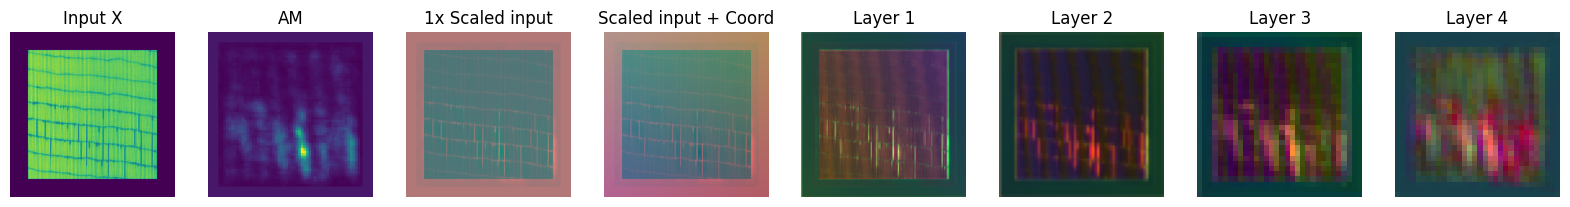

In [78]:

# plot PCA images in 2 subplots
fig, axes = plt.subplots(1, 8, figsize=(20, 10))

axes[0].imshow(scaleImage(pca_images1[1]))
axes[0].set_title('Input X')
axes[0].axis('off')
axes[1].imshow(scaleImage(pca_images1[0]))
axes[1].set_title('AM')
axes[1].axis('off')
axes[2].imshow(scaleImage(pca_images[1]))
axes[2].set_title('1x Scaled input')
axes[2].axis('off')
axes[3].imshow(scaleImage(pca_images[2]))
axes[3].set_title('Scaled input + Coord')
axes[3].axis('off')
axes[4].imshow(scaleImage(pca_images[3]))
axes[4].set_title('Layer 1')
axes[4].axis('off')
axes[5].imshow(scaleImage(pca_images[4]))
axes[5].set_title('Layer 2')
axes[5].axis('off')
axes[6].imshow(scaleImage(pca_images[5]))
axes[6].set_title('Layer 3')
axes[6].axis('off')
axes[7].imshow(scaleImage(pca_images[6]))
axes[7].set_title('Layer 4')
axes[7].axis('off')



plt.show()

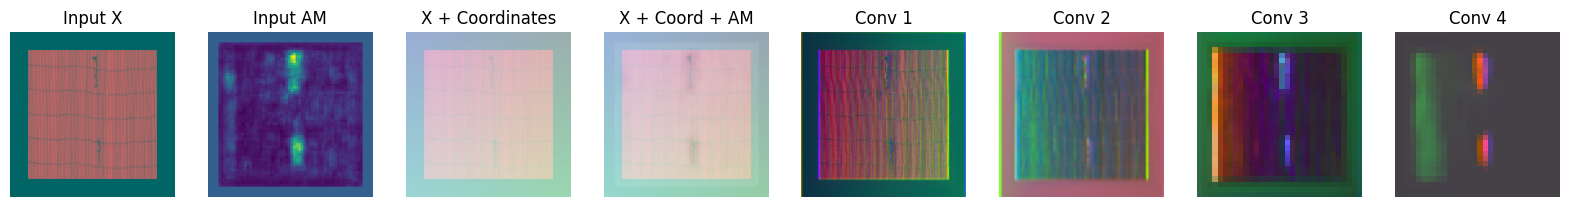

In [21]:

# plot PCA images in 2 subplots
fig, axes = plt.subplots(1, 8, figsize=(20, 10))

axes[0].imshow(scaleImage(pca_images[0]))
axes[0].set_title('Input X')
axes[0].axis('off')
axes[1].imshow(scaleImage(pca_images1[0]))
axes[1].set_title('Input AM')
axes[1].axis('off')
axes[2].imshow(scaleImage(pca_images2[0]))
axes[2].set_title('X + Coordinates')
axes[2].axis('off')
axes[3].imshow(scaleImage(pca_images3[0]))
axes[3].set_title('X + Coord + AM')
axes[3].axis('off')
axes[4].imshow(scaleImage(pca_images[3]))
axes[4].set_title('Conv 1')
axes[4].axis('off')
axes[5].imshow(scaleImage(pca_images[4]))
axes[5].set_title('Conv 2')
axes[5].axis('off')
axes[6].imshow(scaleImage(pca_images[5]))
axes[6].set_title('Conv 3')
axes[6].axis('off')
axes[7].imshow(scaleImage(pca_images[6]))
axes[7].set_title('Conv 4')
axes[7].axis('off')

plt.show()

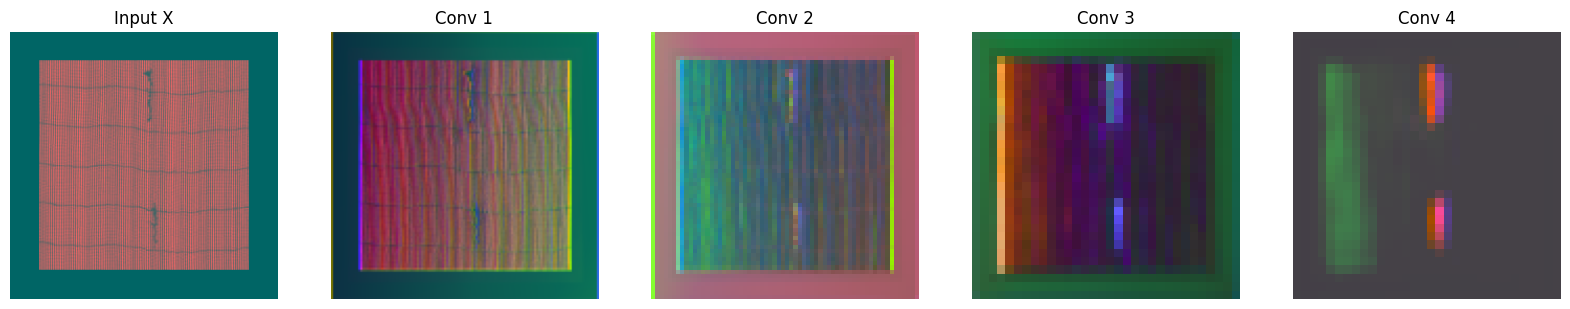

In [22]:
# plot PCA images in 2 subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes[0].imshow(scaleImage(pca_images[0]))
axes[0].set_title('Input X')
axes[0].axis('off')
axes[4-3].imshow(scaleImage(pca_images[3]))
axes[4-3].set_title('Conv 1')
axes[4-3].axis('off')
axes[5-3].imshow(scaleImage(pca_images[4]))
axes[5-3].set_title('Conv 2')
axes[5-3].axis('off')
axes[6-3].imshow(scaleImage(pca_images[5]))
axes[6-3].set_title('Conv 3')
axes[6-3].axis('off')
axes[7-3].imshow(scaleImage(pca_images[6]))
axes[7-3].set_title('Conv 4')
axes[7-3].axis('off')

plt.show()

In [207]:
print(pca_images[5])

[[[-9.61646612e-04  1.27416272e-02  4.33183834e-03]
  [ 1.44686189e-03  7.73494644e-03 -4.69113787e-04]
  [-2.55618314e-03 -1.46679324e-03 -1.39104086e-04]
  [-3.83268343e-03 -3.57741211e-03  4.35512839e-03]
  [-5.65019622e-03 -2.73607997e-03  2.99838558e-03]
  [-6.18667807e-03 -1.78781600e-04 -1.43845752e-03]
  [-3.99106834e-03  5.36149321e-03 -2.82281102e-03]
  [-4.87849722e-03  1.16780298e-02 -1.09220529e-03]
  [-8.85471143e-03  8.77559930e-03 -1.72092393e-03]
  [-9.72226262e-03  5.89166908e-03 -1.29742490e-03]
  [-5.75263239e-03  7.06371618e-03  2.97442515e-04]
  [-2.29297206e-03  7.73138134e-03 -3.16234236e-03]
  [-2.09649350e-03  8.32252484e-03 -3.62746208e-03]
  [-1.81939674e-03  4.18021483e-03 -1.39836385e-03]
  [-3.44069931e-03 -6.09494222e-04  8.32310820e-04]
  [ 3.66370147e-03  1.33451575e-03  3.36030760e-04]]

 [[ 1.79568271e-03  1.58343315e-02  4.51559294e-03]
  [ 1.81848425e-02  3.83213838e-03 -5.58688026e-03]
  [ 9.70012695e-03 -9.59812663e-04 -8.62264819e-03]
  [ 1.1408